In [2]:
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from bokeh.plotting import figure

In [9]:
path = r"C:\Users\Giorgio\Documents\Data Science\ADM\HW2\Data"

pl = pd.read_json(path + "\Matches\matches_England.json")
df = pd.DataFrame(pl, columns = ['gameweek','label'])
print(df)
df.sort_values(by = ['gameweek'], inplace = True)
df.reset_index(drop = True, inplace = True)
df

ValueError: Expected object or value

In [10]:
df['team1'] = ''
df['team2'] = ''
df['score1'] = 0
df['score2'] = 0

NameError: name 'df' is not defined

In [11]:
for i in range(len(df)):
    df['team1'][i] = ((df['label'][i].replace(',', '-')).split('-'))[0].strip()
    df['team2'][i] = ((df['label'][i].replace(',', '-')).split('-'))[1].strip()
    p1 = ((df['label'][i].replace(',', '-')).split('-'))[2].strip()
    p2 = ((df['label'][i].replace(',', '-')).split('-'))[3].strip()
    if(int(p1) > int(p2)):
        df['score1'][i] +=  3
    elif(int(p1) == int(p2)):
        df['score1'][i] += 1
        df['score2'][i] += 1
    else:
        df['score2'][i] += 3


NameError: name 'df' is not defined

In [6]:
df.iloc[[1]]

,gameweek,label,team1,team2,score1,score2
1,1,"Manchester United - West Ham United, 4 - 0",Manchester United,West Ham United,3,0


In [12]:
ars = pd.DataFrame(columns = ['gameweek', 'label', 'team1', 'team2', 'score1', 'score2'])
for i in range(len(df)):
    if bool(df.team1[i] == 'Arsenal' or df.team2[i] == 'Arsenal'):
        ars = ars.append(df.iloc[[i]])
ars

NameError: name 'df' is not defined

In [13]:
d = {}
for i in range(len(df)):
    if df.team1[i] not in d:
        d[df.team1[i]] = [int(df.score1[df.gameweek[i]-1]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team1[i]][df.gameweek[i]-1] += df.score1[i] + d[df.team1[i]][df.gameweek[i]-2]
    if df.team2[i] not in d:
        d[df.team2[i]] = [int(df.score2[df.gameweek[i]-1]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team2[i]][df.gameweek[i]-1] += df.score2[i] + d[df.team2[i]][df.gameweek[i]-2]
for elem in d:
    print(elem, d[elem])
    
    
wins = {}
for elem in d:
    if elem not in wins:
        wins[elem] = 2
print(wins)

NameError: name 'df' is not defined

In [7]:
allsquad = pd.DataFrame(d)
allsquad

""


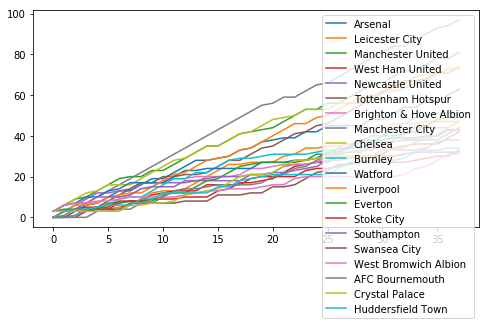

In [10]:
allsquad.plot(figsize = (8, 4))

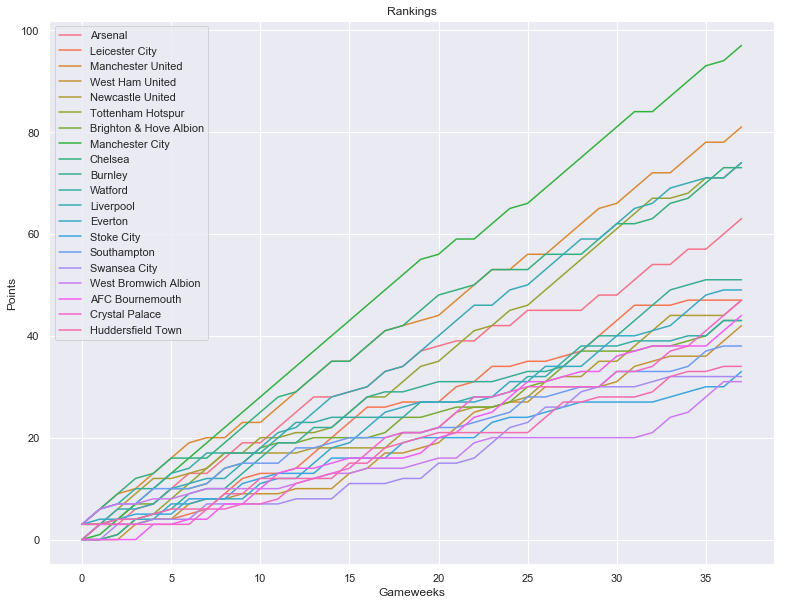

In [27]:
se.set(rc={'figure.figsize':(13, 10)})
x = se.lineplot(data = allsquad, hue = allsquad.columns, style = 'choice', dashes = False)
plt.xlabel("Gameweeks")
plt.ylabel("Points")
plt.title("Rankings") # You can comment this line out if you don't need title
plt.show(x)